#Business Case: Yulu - Hypothesis Testing

##About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

##How you can help here?

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, mode
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import stats
import yfinance as yf
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency

##Step 1: Understanding the Data

In [ ]:
#Importing the dataset
df = pd.read_csv("/content/yulu.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 0.00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 1.00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 2.00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 3.00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 4.00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Exploring the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%d-%m-%Y %H.%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


##Column Profiling:

datetime: datetime
season: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius
atemp: feeling temperature in Celsius
humidity: humidity
windspeed: wind speed
casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered

In [ ]:
# Datatype of following attributes needs to changed to proper data type
# datetime - to datetime
# season - to categorical
# holiday - to categorical
# workingday - to categorical
# weather - to categorical

cat_cols = ['season', 'holiday', 'workingday', 'weather']
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
df[num_cols] = df[num_cols].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  float64       
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  float64       
 10  registered  10886 non-null  float64       
 11  count       10886 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(7)
memory usage: 723.7 KB


In [ ]:
#Shape and Size of the Data
df.shape

(10886, 12)

In [ ]:
#descriptive statistics for numerical columns
df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#Check the missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#Check the unique data
unique = df.nunique()
unique

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

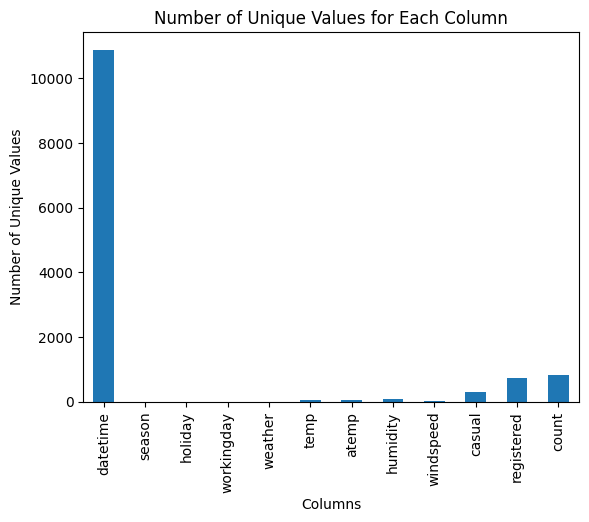

In [ ]:
#plot the unique values
unique.plot(kind='bar')
plt.title('Number of Unique Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.show()

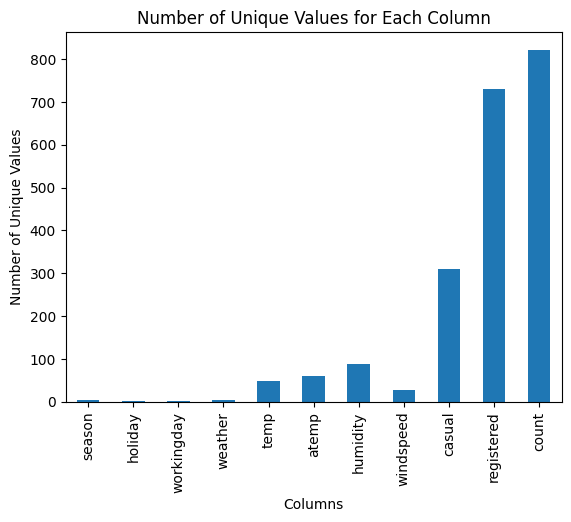

In [ ]:
#plotting the unique values without datetime
unique.drop('datetime', axis=0).plot(kind='bar')
plt.title('Number of Unique Values for Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.show()

##Step 2: Bi-Variate Analysis & Univariate Analysis

###Bi-Variate Analysis

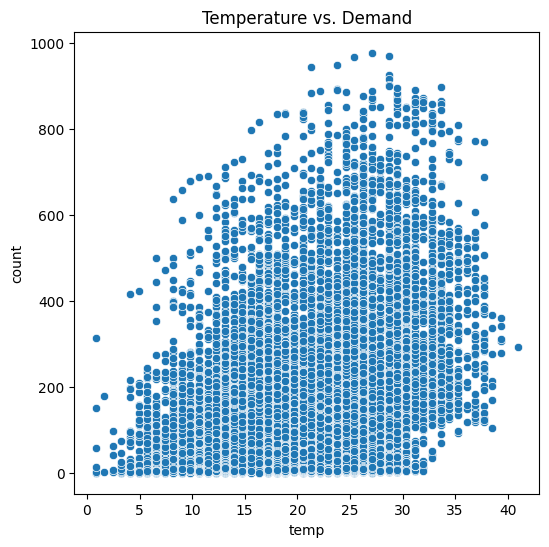

In [ ]:
# Scatter plot between temperature and count
plt.figure(figsize=(6, 6))
sns.scatterplot(data= df, x='temp', y='count')
plt.title('Temperature vs. Demand')
plt.show()

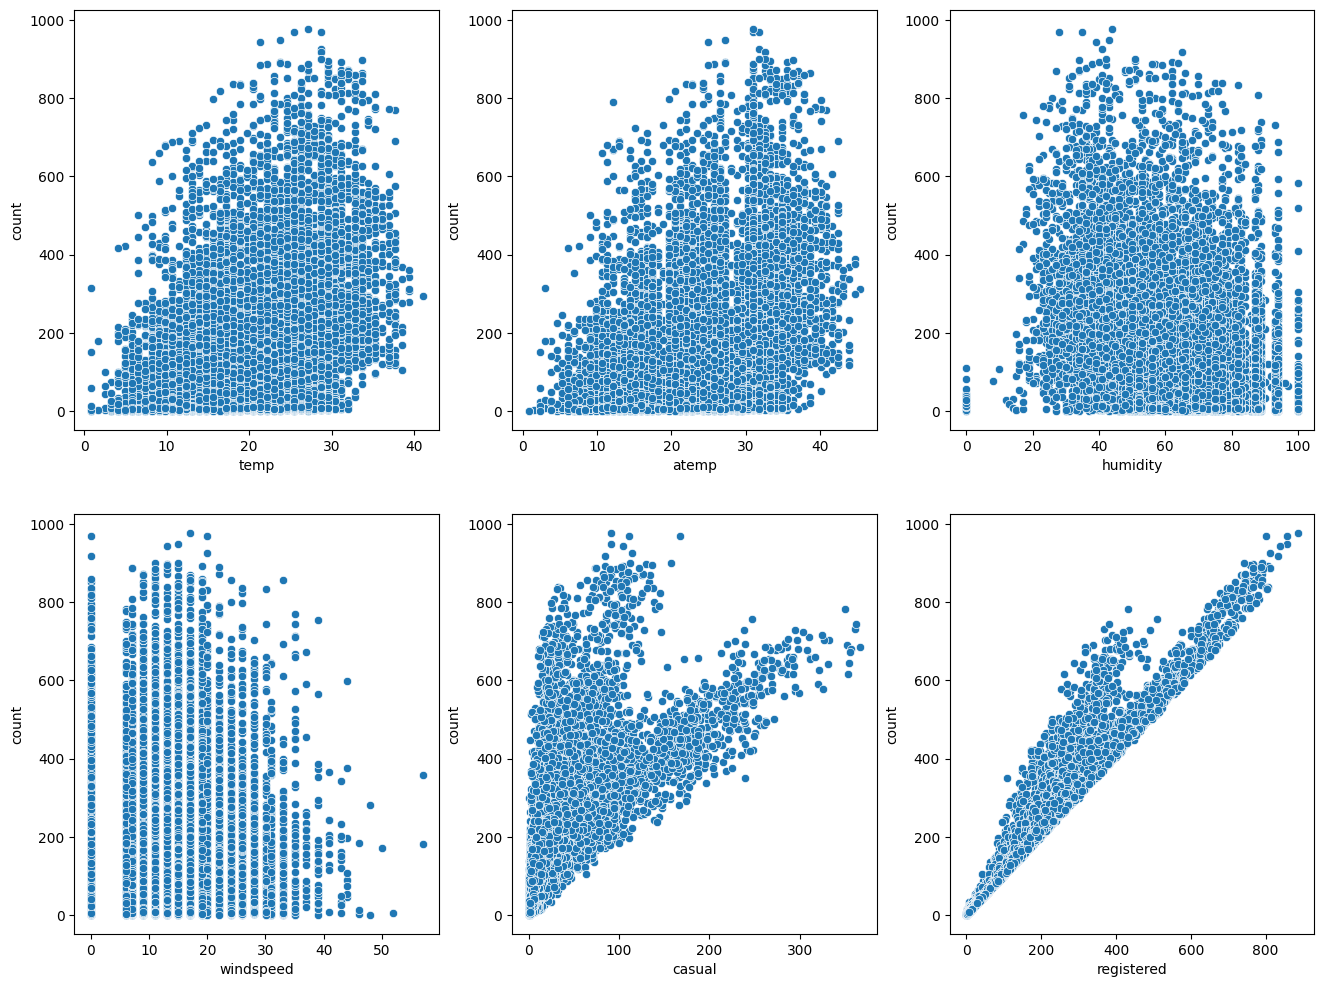

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row,col])
    index += 1
plt.show()

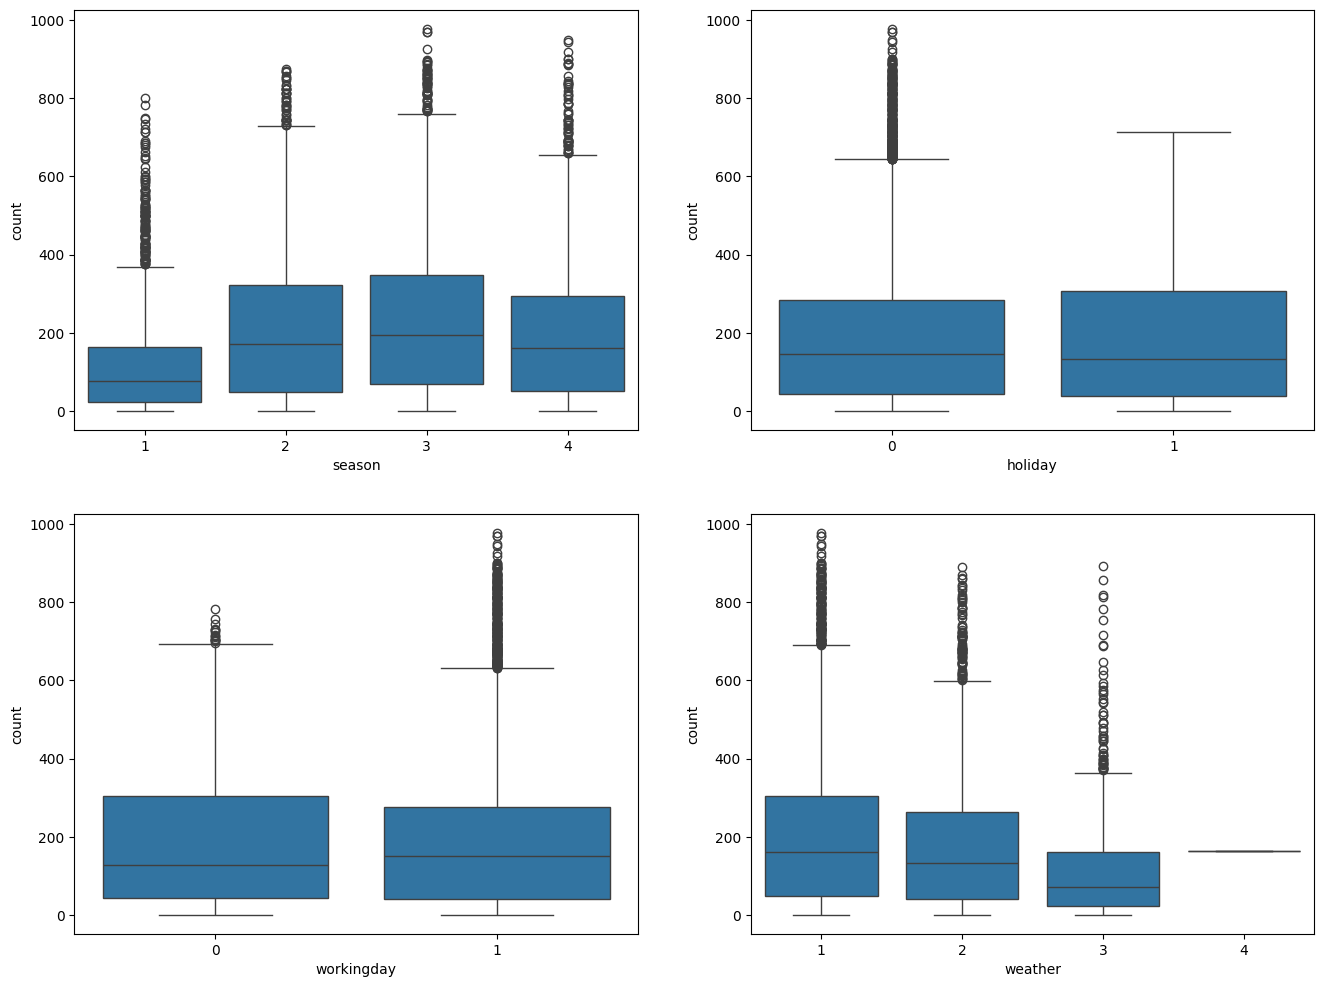

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
    index += 1
plt.show()

In [ ]:
df.corr()['count']

datetime      0.310187
season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

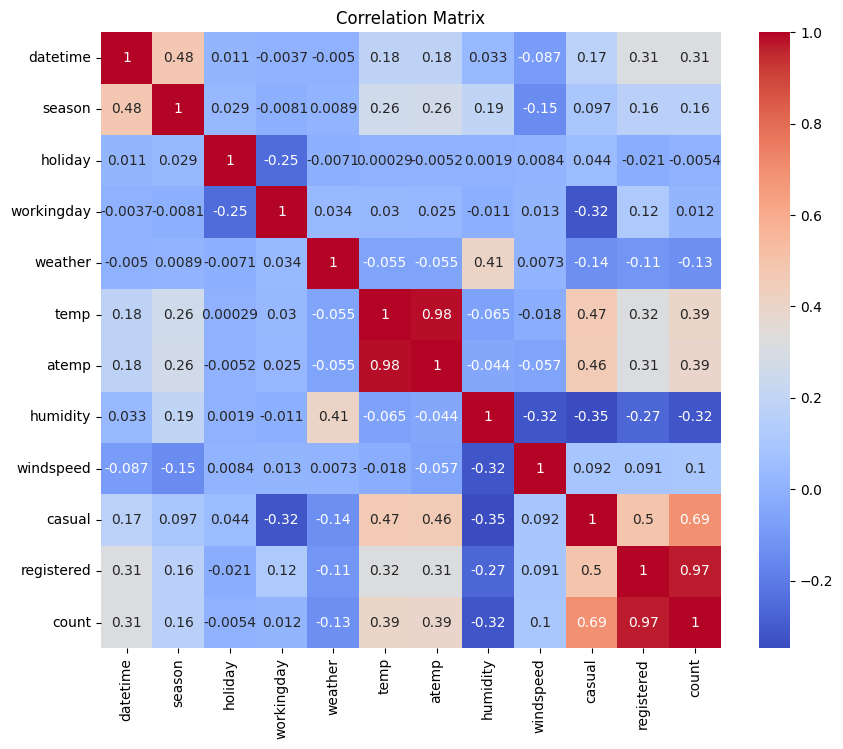

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

###Univariate Analysis

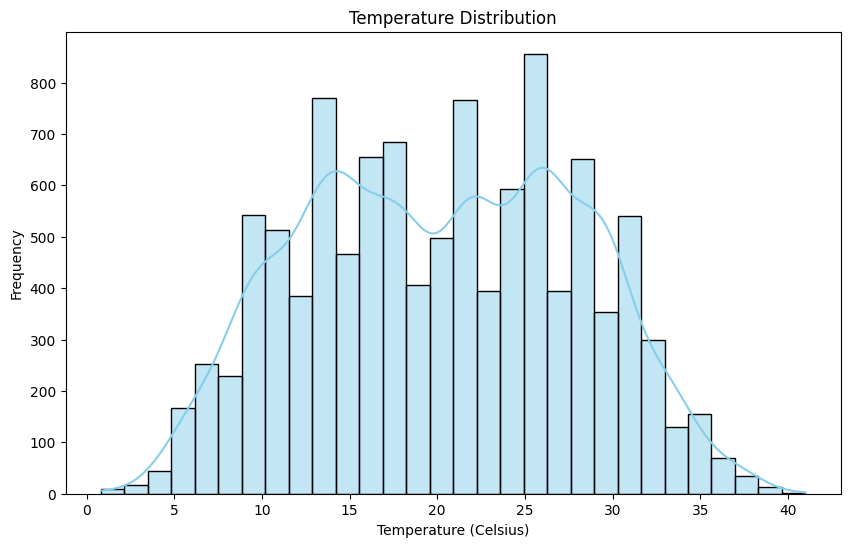

In [ ]:
# Histogram for temperature
plt.figure(figsize=(10, 6))
sns.histplot(data = df['temp'], kde= True, bins=30, color='skyblue', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

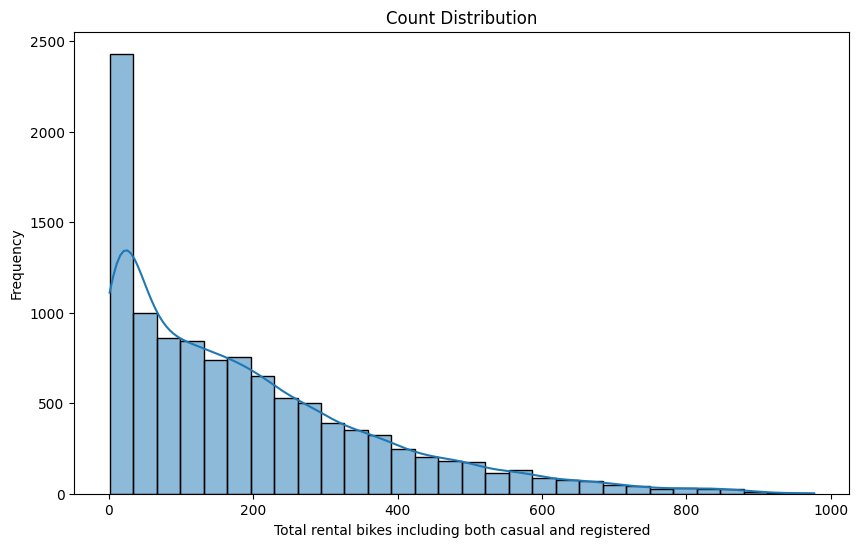

In [ ]:
# Histogram for count
plt.figure(figsize=(10, 6))
sns.histplot(data = df['count'], kde=True, bins=30, edgecolor='black')
plt.title('Count Distribution')
plt.xlabel('Total rental bikes including both casual and registered')
plt.ylabel('Frequency')
plt.show()

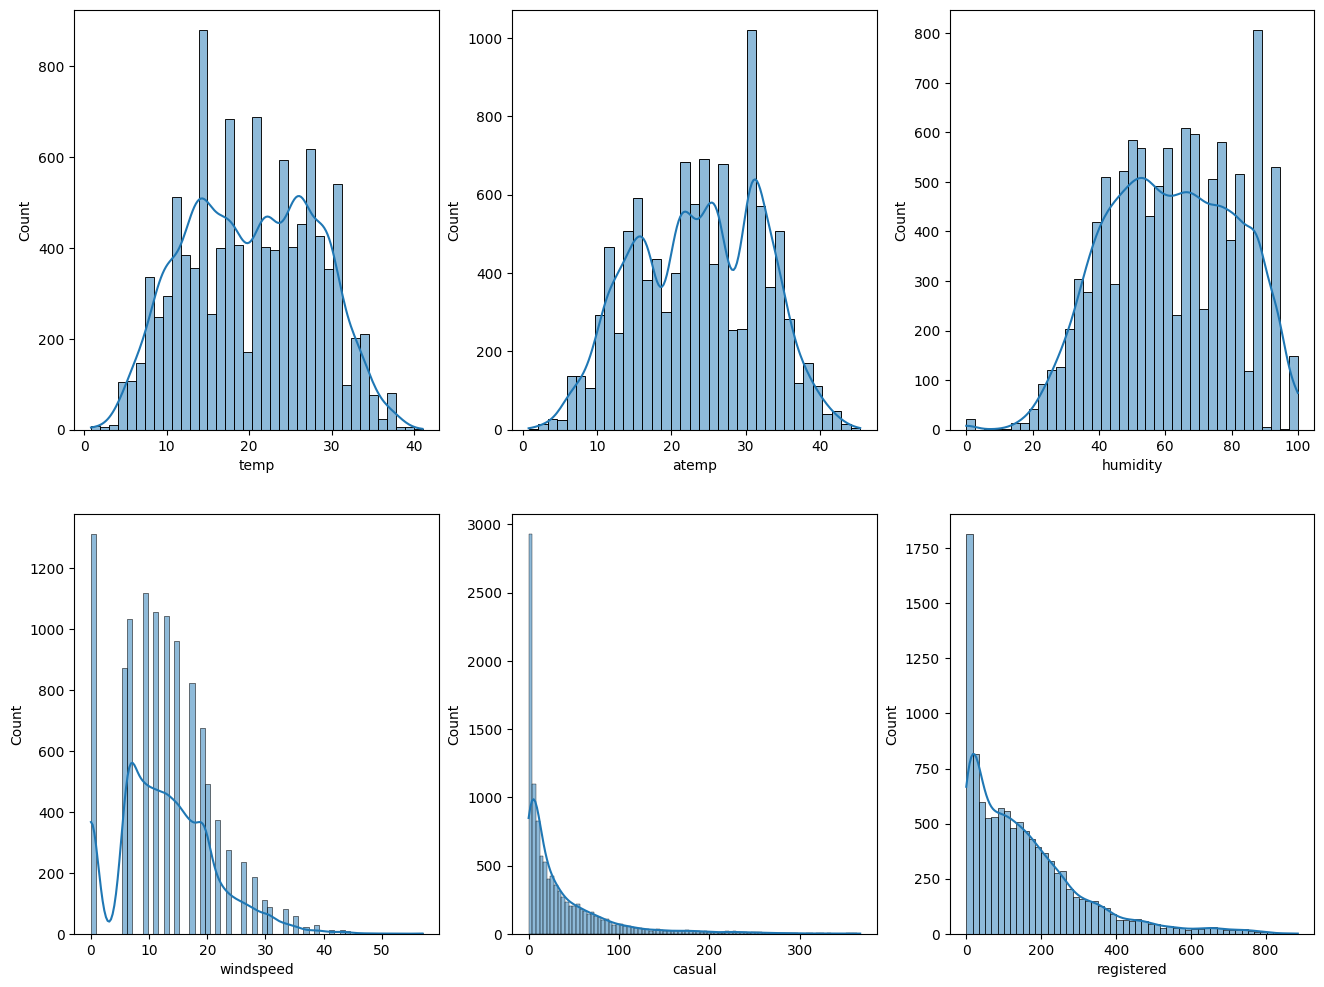

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
    index += 1
plt.show()

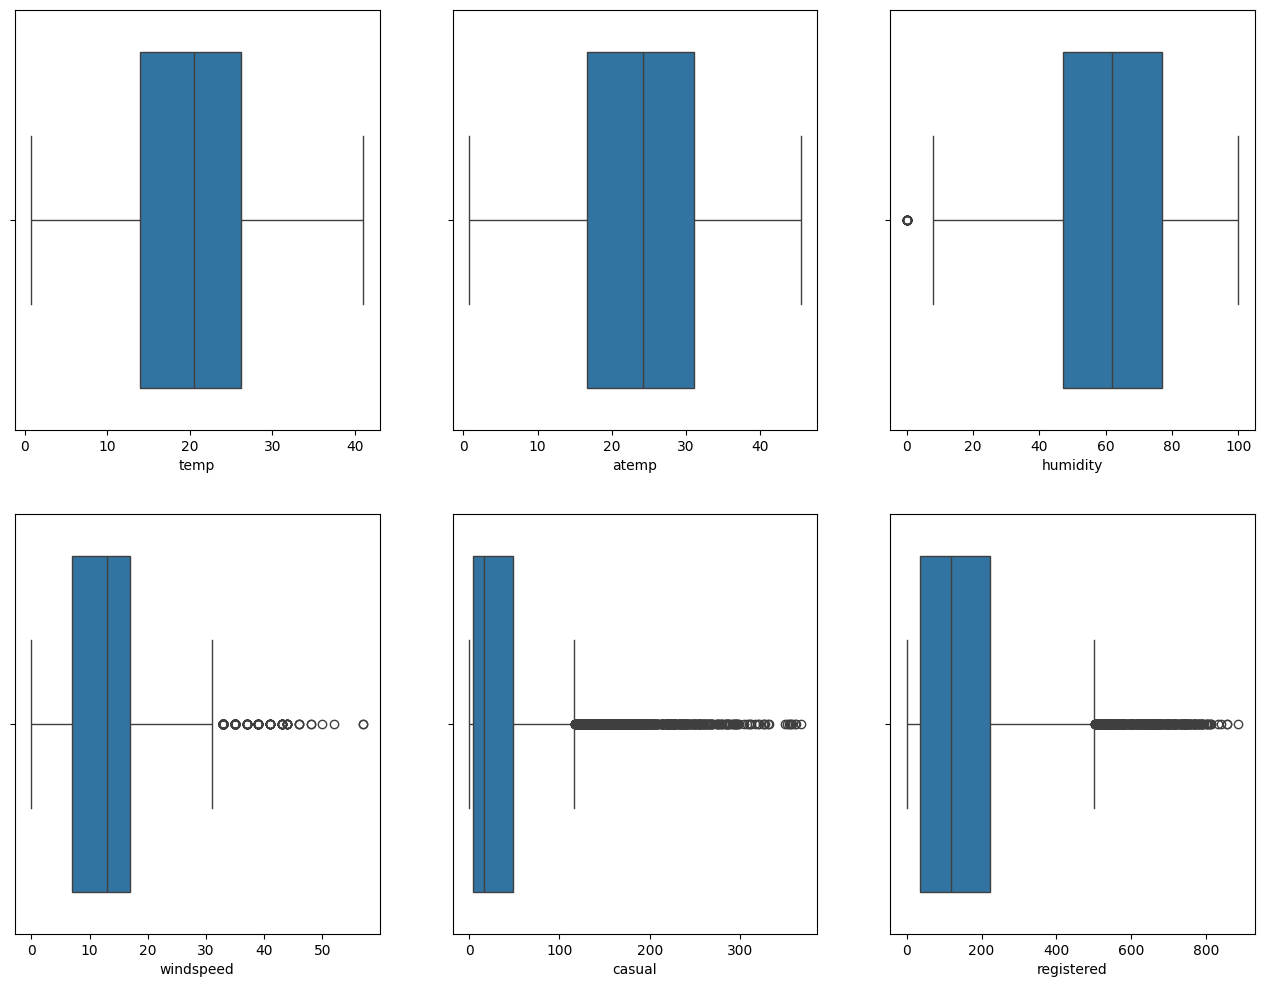

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
    index += 1
plt.show()

Skewness and Kurtosis
Skewness indicates the asymmetry of the distribution, and kurtosis indicates the tailedness.

In [ ]:
# Calculate skewness and kurtosis
print('Skewness of count:', df['count'].skew())
print('Kurtosis of count:', df['count'].kurt())

Skewness of count: 1.2420662117180776
Kurtosis of count: 1.3000929518398334


Step 3: 2-Sample t-Test

In [ ]:
# Separate data into working days and non-working days
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Perform t-test
t_stat, p_val = ttest_ind(working_day, non_working_day)
print(f'T-Statistic: {t_stat}, P-Value: {p_val}')

T-Statistic: 1.2096277376026694, P-Value: 0.22644804226361348


Step 4: ANOVA

In [ ]:
# One-way ANOVA for season
model = ols('count ~ C(season)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq       df           F         PR(>F)
C(season)  2.190083e+07      3.0  236.946711  6.164843e-149
Residual   3.352721e+08  10882.0         NaN            NaN


Step 5: Chi-Square Test

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['holiday'], df['count'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

Chi-Square Statistic: 701.3934517892412, P-Value: 0.9990056620304141


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting features and target variable
X = df[['temp', 'humidity', 'windspeed', 'season', 'holiday', 'workingday', 'weather']]
y = df['count']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['season', 'holiday', 'workingday', 'weather'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-Squared: {r2}')

R-Squared: 0.2870635640102329


Hypothesis Testing - 1

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (H1): Weather is not independent of the season

Significance level (alpha): 0.05

In [ ]:
data_table = pd.crosstab(df['season'], df['weather'])
print("values:")
data_table

values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
val = stats.chi2_contingency(data_table)
exp_values = val[3]
exp_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [ ]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05

degrees of freedom:  9


In [ ]:
chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, exp_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.


Hypothesis Testing - 2

Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

In [ ]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

In [ ]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

##Hypothesis Testing - 3

Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05

In [ ]:
# defining the data groups for the ANOVA

gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

#Insights:
1.	The average temperature is 20.23°C, with a maximum of 41.00°C. According to the scatterplot analysis of temperature versus demand, higher temperatures correlate with increased registrations.
2.	Lower wind speeds are associated with higher registration numbers.
3.	Registrations are higher on holidays compared to working days.
4.	The temperature distribution ranges from 10°C to 30°C.
5.	Registrations decrease during rain, thunderstorms, snow, or fog.
6.	When humidity is below 20%, the number of bike rentals is extremely low.
7.	Temperatures below 10°C result in fewer bike rentals.
8.	Wind speeds above 35 km/h lead to a reduction in bike rentals.
9.	The company should stock more bikes during the summer and fall seasons.
10.	Demand is higher during summer and fall compared to other seasons.
11.	At a significance level of 0.05, the day being a working day does not affect the number of bike rentals.
12.	On days with very low humidity, the company should stock fewer bikes.
13.	On days with temperatures below 10°C or very cold days, the company should have fewer bikes available.
14.	During wind speeds over 35 km/h or thunderstorms, the company should reduce the number of bikes in stock.
